In [189]:
import tensorflow as tf 
import numpy as np   
import pandas as pd 
from  tensorflow import keras
import json 
import nltk 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input,Embedding,LSTM,Dense,Flatten 
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

Preparing Json file


In [190]:
%%writefile content.json   
{
  "intents": [
    {
      "tag": "greeting",
      "inputs": [
        "hello",
        "hi",
        "hey",
        "how are you",
"Hello there! How's your day treating you?",
"Hi there! Need any assistance with something today?",
"Hey! How are things going on your end?",
"Good morning! Ready to tackle the day ahead?",
"Good afternoon! How's your day shaping up?",
"Good evening! Anything I can help you with?",
"Greetings! How can I make your day better?",
"Howdy! What's on your mind today?",
"Hi, how can I assist you on this fine day?",
"Hello, what can I do for you today?",
"Hey there, what brings you here today?",
"Hi! How's your day unfolding so far?",
"Hello! How are you feeling today?",
"Hi! Pleasure to meet you. How can I be of service?",
"Good to see you! What brings you by today?",
"Hey, what's up? How can I help you?",
"Hi, there! Ready for some assistance?",
"Well, hello there! What's on your mind?",
"Hey! How's everything going for you?",
"Good morning! What can I do to start your day off right?",
"Hi! How's your day been treating you so far?",
"Hello! Need any help with anything today?",
"Hi! Looking for assistance with something?",
"Hey! Ready to tackle any challenges today?",
"Good morning! How can I make your day better?",
"Hello! How are you doing on this fine day?",
"Hi! How can I assist you today?",
"Hey! What's on your agenda for today?",
"Good morning! Need a hand with anything?",
"Hello! Ready to get things done today?",
"Hi! How's your day shaping up?",
"Hey! How can I assist you right now?",
"Good morning! What brings you here today?",
"Hello! Need any support with something?",
"Hi! How's everything going for you?",
"Hey! How can I make your day easier?",
"Good morning! Ready for a productive day?",
"Hello! How can I help you achieve your goals?",
"Hi! What can I do to assist you today?",
"Hey! How's everything in your world?",
"Good morning! Need assistance with anything today?",
"Hello! How can I brighten your day?",
"Hi! Ready to conquer the day ahead?",
"Hey! How can I make your life easier today?",
"Good morning! How's everything going?",
"Hello! What brings you here today?",
"Hi! How can I be of service to you?",
"Hey! Need any help with something?",
"Good morning! Ready to seize the day?",
"Hello! How can I assist you right now?",
"Hi! What's on your mind today?",
"Hey! How can I support you today?",
"Good morning! Need assistance with anything?",
"Hello! How can I make your day better?",
"Hi! Ready to tackle any challenges together?",
"Hey! How can I assist you on this fine day?",
"Good morning! How can I help you today?",
"Hello! How's everything going for you?",
"Hi! Need any help with your tasks?",
"Hey! How can I make your day more manageable?",
"Good morning! How's your day treating you so far?",
"Hello! How can I assist you in achieving your goals?",
"Hi! Ready to make progress today?",
"Hey! How can I support you in your endeavors?",
"Good morning! Need assistance with anything today?",
"Hello! How can I make your day brighter?",
"Hi! How can I be of service to you right now?",
"Hey! What can I do to help you today?",
"Good morning! How can I assist you on this lovely day?",
"Hello! How's everything in your world?",
"Hi! Ready to tackle any challenges together?",
"Hey! How can I make your life easier today?",
"Good morning! How's everything going?",
"Hello! What brings you here today?",
"Hi! How can I be of service to you?",
"Hey! Need any help with something?",
"Good morning! Ready to seize the day?",
"Hello! How can I assist you right now?",
"Hi! What's on your mind today?",
"Hey! How can I support you today?",
"Good morning! Need assistance with anything?",
"Hello! How can I make your day better?",
"Hi! Ready to tackle any challenges together?",
"Hey! How can I assist you on this fine day?",
"Good morning! How can I help you today?",
"Hello! How's everything going for you?",
"Hi! Need any help with your tasks?",
"Hey! How can I make your day more manageable?",
"Good morning! How's your day treating you so far?",
"Hello! How can I assist you in achieving your goals?",
"Hi! Ready to make progress today?",
"Hey! How can I support you in your endeavors?",
"Good morning! Need assistance with anything today?",
"Hello! How can I make your day brighter?",
"Hi! How can I be of service to you right now?",
"Hey! What can I do to help you today?"
      ],
      "responses": [
        "Hello! How can I assist you today?",
        "Hi there! How can I help you?",
        "Hey! What can I do for you?",
        "Good morning! How can I assist you?",
        "Good afternoon! How can I help you today?",
        "Good evening! How can I assist you?",
        "Greetings! How can I help you?",
        "Howdy! How can I assist you today?",
        "Hi, I'm here to help. What do you need?",
        "Hello, I'm here to assist you. What can I do for you?",
        "Hey there! How can I assist you today?",
        "Hi! How can I help you?",
        "Hello! How's your day going? What can I do for you?",
        "Hi! How are you today? How can I assist you?",
        "Good to see you! How can I help you?"
      ]
    },
    {
      "tag": "farewell",
      "inputs": [
"Goodbye!",
"Bye!",
"See you later!",
"See you soon!",
"Take care!",
"Have a great day!",
"Have a nice day!",
"Until next time!",
"Farewell!",
"So long!",
"Goodbye, it was nice talking to you!",
"Bye, have a good one!",
"See you around!",
"Catch you later!",
"Peace out!",
"Thank you, and goodbye!",
"Thank you, and see you later!",
"Thank you, and take care!",
"Thank you, have a great day!",
"Thank you, and have a nice day!",
"Thank you, until next time!",
"Thank you, farewell!",
"Thank you, so long!",
"Thank you, it was nice talking to you!",
"Thank you, bye, have a good one!",
"Thank you, see you around!",
"Thank you, catch you later!",
"Thank you, peace out!",
"Adios!",
"Until we meet again!",
"Take it easy!",
"Stay safe!",
"Bye for now!",
"Take it easy!",
"Goodbye, and take care!",
"Goodbye, see you on the flip side!",
"Time to bid adieu!",
"See you in a while, crocodile!",
"Goodbye, until we talk again!",
"Keep in touch!",
"See you in the near future!",
"Take care, see you soon!",
"Goodbye, stay well!",
"Adieu, my friend!",
"Until next time, farewell!",
"Bye-bye, take care!",
"See you later, alligator!",
"Adios, amigos!",
"Goodbye, and best wishes!",
"See you on the other side!",
"Safe travels!",
"Time to say farewell!",
"Goodbye, and don't be a stranger!",
"Bye for now, take care!",
"See you next time!",
"Time to say goodbye!",
"Take care, until next time!",
"Goodbye, and may the force be with you!",
"See you next time, same place!",
"Time to say adios!",
"Goodbye, and keep smiling!",
"See you in a bit!",
"Time to say farewell, my friend!",
"Goodbye, and take it easy!",
"See you on the flip side!",
"Time to say adieu, until we meet again!",
"Goodbye, and have a fantastic day!",
"See you on the other side of the rainbow!",
"Time to say farewell, until next time!",
"Goodbye, and have a splendid day!",
"See you in a jiffy!",
"Time to say adios, amigo!",
"Goodbye, and have a wonderful day ahead!",
"See you on the sunny side!",
"Time to say farewell, until we meet again!",
"Goodbye, and have a great day ahead!",
"See you when I see you!",
"Time to say adieu, until next we meet!",
"Goodbye, and have a marvelous day!",
"See you in a bit, alligator!",
"Time to say farewell, until next we chat!",
"Goodbye, and wishing you all the best!",
"See you later, have a great day!",
"Time to say adios, until next we talk!",
"Goodbye, and keep shining!",
"See you in a bit, have a wonderful day!",
"Time to say farewell, until next we connect!",
"Goodbye, and have a splendid day ahead!",
"See you soon, stay safe!",
"Time to say adios, until next we cross paths!",
"Goodbye, and keep smiling!",
"See you later, take care of yourself!",
"Time to say farewell, until next we meet in person!",
"Goodbye, and may happiness follow you!",
"See you soon, take it easy on yourself!",
"Time to say adios, until next we see each other!",
"Goodbye, and may peace be with you!",
"See you later, have a fantastic day!",
"Time to say farewell, until next we catch up!",
"Goodbye, and may luck be on your side!",
"See you soon, keep shining!",
"Time to say adios, until next we talk!",
"Goodbye, and may your dreams come true!",
"See you later, keep smiling!",
"Time to say farewell, until next we meet!",
"Goodbye, and may sunshine follow you wherever you go!",
"See you soon, stay positive!",
"Time to say adios, until next we connect!",
"Goodbye, and may laughter fill your days!",
"See you later, take care of yourself!",
"Time to say farewell, until next we meet in the virtual world!",
"Goodbye, and may love surround you always!",
"See you soon, have a wonderful day!",
"Time to say adios, until next we see each other around!",
"Goodbye, and may happiness be your constant companion!",
"See you later, keep shining bright!",
"Time to say farewell, until next we meet again somewhere!"
      ],
      "responses": [
        "Goodbye! Have a great day!",
        "Bye! Take care!",
        "See you later! Have a good one!",
        "See you soon! Take care!",
        "Take care! Goodbye!",
        "Have a great day! Goodbye!",
        "Have a nice day! Bye!",
        "Until next time! Goodbye!",
        "Farewell! Take care!",
        "So long! Have a great day!",
        "Goodbye, it was nice talking to you! Take care!",
        "Bye, have a good one! See you later!",
        "See you around! Take care!",
        "Catch you later! Bye!",
        "Peace out! Have a nice day!"
      ]
    },
    {
  "tag": "order_status_inquiry",
  "inputs": [
"Where is my order?",
"Can you check my order status?",
"I haven't received my order yet.",
"What's the status of my order?",
"Is my order on its way?",
"When will my package arrive?",
"Can you track my shipment?",
"I need to know when my order will be delivered.",
"My order hasn't arrived. Can you help?",
"Has my order been shipped yet?",
"I'm curious about the status of my order.",
"How long will it take for my order to arrive?",
"Could you update me on my order status?",
"I want to check the status of my recent order.",
"Can you tell me if my order has been dispatched?",
"Where's my package?",
"Can you provide an update on my order?",
"Is there any update on my order?",
"When can I expect my order to arrive?",
"Can you tell me when my order will be delivered?",
"Where's my stuff?",
"I'm wondering when my order will arrive.",
"Can you give me an update on my shipment?",
"Is my order still in transit?",
"When can I expect my package to arrive?",
"Has my order left the warehouse?",
"Can you track my order for me?",
"Is my order delayed?",
"Could you check if my order has been processed?",
"I'm looking for information on my order status.",
"When will my order ship?",
"Is there any news on my order?",
"Where's my delivery?",
"Can you check if my order is out for delivery?",
"When should I expect my order to arrive?",
"Can you confirm if my order has been dispatched?",
"Is my order stuck somewhere?",
"Can you verify the status of my order?",
"Has my order been fulfilled yet?",
"I'm eager to know when my order will arrive.",
"Can you tell me if my order is on schedule?",
"Where's my order, it's been a while?",
"Can you check if my order is still processing?",
"Is there an estimated delivery date for my order?",
"When will my order be shipped out?",
"Can you confirm the shipping details of my order?",
"Can you provide an update on my delivery status?",
"Is there any delay with my order?",
"Where's my package, it's overdue?",
"I'm concerned about the status of my order.",
"Can you tell me if my order is delayed?",
"Has my order encountered any issues?",
"Can you track down my shipment?",
"Is there a problem with my order?",
"Can you ensure my order is on track for delivery?",
"When can I anticipate my order to arrive?",
"Is my order facing any shipping delays?",
"Can you investigate the whereabouts of my order?",
"Where's my order, it's past the estimated delivery date?",
"Can you double-check if my order has been dispatched?",
"I'm anxious to know when my order will arrive.",
"Can you provide any information on my order status?",
"Is my order still in the processing stage?",
"Can you give me a status update on my order?",
"When will my order be shipped?",
"Can you confirm the expected delivery time for my order?",
"Has there been any update on my order recently?",
"Can you check if my order is stuck in transit?",
"Is my order on track for delivery?",
"Can you verify if my order has been shipped out?",
"I'm eager to know if my order has been processed yet.",
"Can you tell me if there's a delay with my order?",
"Where's my shipment, it's been longer than usual?",
"I'm uncertain about the status of my order.",
"Can you investigate the delay with my order?",
"Is there any issue with my order?",
"Can you provide an estimated delivery date for my order?",
"Is my order still pending?",
"Can you check if my order is on schedule?",
"Is my order being prepared for shipment?",
"Can you verify the shipping status of my order?",
"Is my order experiencing any shipping problems?",
"Can you provide a status update on my order delivery?",
"When can I expect my package to arrive?",
"Can you confirm the dispatch status of my order?",
"I'm concerned about the progress of my order.",
"Can you provide any updates on my order status?",
"Is my order ready for delivery?",
"Can you check if my order is in transit?",
"Has my order been dispatched yet?",
"I'm eager to know the whereabouts of my order.",
"Can you track the delivery progress of my order?",
"Is my order still on track for delivery?",
"Can you confirm the shipment details for my order?",
"Is my order experiencing any delays in processing?",
"Can you verify if my order has been shipped?"
  ],
  "responses": [
    "Sure, please provide your order number so I can check the status for you.",
    "Let me check the status of your order. Could you please provide your order number?",
    "I'll assist you with your order status. What's your order number?",
    "I can help you with that. Could you provide your order number for me to check?",
    "Of course, I just need your order number to track your shipment.",
    "Let's check the status of your shipment. Could you provide your order number?",
    "I'm here to assist you with your order status. Please provide your order number.",
    "Sure, I'll need your order number to provide you with the status.",
    "I understand your concern. Please provide your order number so I can assist you.",
    "I'm sorry to hear that your order hasn't arrived. Could you provide your order number?",
    "Let me check if your order has been shipped. Can you please provide your order number?",
    "I'll find out the estimated delivery time for you. What's your order number?",
    "Certainly, I'll update you on your order status. Please provide your order number.",
    "Sure thing, I'll need your order number to check the status for you.",
    "Let me check if your order has been dispatched. Could you provide your order number?"
  ]
},
{
  "tag": "policy_inquiry",
  "inputs": 

[
    "What is your company's return policy for online purchases?",
    "Can you explain the return process for items bought in-store?",
    "How long do I have to return an item for a refund?",
    "What are the conditions for returning products under your company's policy?",
    "Is there a restocking fee for returns?",
    "Can I return an item without the original packaging?",
    "What is your company's policy on returning sale items?",
    "Are there any exceptions to your return policy?",
    "Can I exchange an item instead of returning it for a refund?",
    "How do I initiate a return request?",
    "What is the timeframe for returning a defective product?",
    "Does your return policy apply to all product categories?",
    "Can I return an item if I've used it?",
    "What documentation do I need to provide when returning an item?",
    "Is there a limit on the number of returns I can make?",
    "Does your return policy vary for different regions or countries?",
    "Can I return an item purchased with a gift card?",
    "What is the process for returning a gift?",
    "Are shipping fees refundable for returned items?",
    "Can I return an item bought during a promotional offer?",
    "How long does it take to process a return and receive a refund?",
    "Are there any items that are non-returnable?",
    "Can I return an item if I've lost the receipt?",
    "What is your company's policy on returning custom-made products?",
    "Can I return an item bought from a third-party seller on your platform?",
    "How do I return an item if I bought it as part of a bundle or package deal?",
    "Is there a difference in the return policy for in-store and online purchases?",
    "Can I return an item that was purchased using a discount code?",
    "What happens if the item I received is damaged during shipping?",
    "Can I return an item after the return window has expired?",
    "Does your company offer return pickups for large items?",
    "What is the process for returning an item if I received the wrong product?",
    "Are there any hygiene-related restrictions on returning certain items?",
    "Can I return an item if I've altered or modified it?",
    "How do I track the status of my return request?",
    "What is your company's policy on returning perishable goods?",
    "Can I return an item if it was a final sale?",
    "How does your return policy apply to international orders?",
    "Can I return an item without a return authorization number?",
    "What is your company's policy on returning opened software or digital downloads?",
    "Are there any time-sensitive restrictions on returns for seasonal items?",
    "Can I return an item if I no longer have the original tags attached?",
    "What recourse do I have if my return request is denied?",
    "Does your return policy cover accidental damage or wear and tear?",
    "Can I return an item if it was purchased with store credit?",
    "How do I cancel a return request?",
    "What is your company's policy on returning products purchased during clearance sales?",
    "Can I return an item if I've already used a portion of it?",
    "Are there any specific procedures for returning high-value items?",
    "How do I return an item if it was a gift and I don't have the receipt?",
    "Can I return an item if it was purchased using a payment plan or installment option?",
    "Does your return policy cover items damaged by natural disasters or unforeseen events?",
    "What happens if I miss the return window due to extenuating circumstances?",
    "Can I return an item if it was purchased using a promotional gift card?",
    "How does your return policy apply to items bought during flash sales or limited-time offers?",
    "Can I return an item if it was purchased from a third-party seller on your online marketplace?",
    "What is your company's policy on returning items that were customized or personalized?",
    "Can I return an item if it was purchased using a loyalty or rewards points?",
    "Are there any additional charges or deductions when processing returns?",
    "How do I return an item if it was shipped internationally?",
    "Can I return an item if it was purchased as part of a subscription or membership?",
    "What is your company's policy on returning items that were part of a buy-one-get-one promotion?",
    "Can I return an item if it was purchased using a discount voucher or coupon?",
    "How do I return an item if it was delivered damaged or defective?",
    "Can I return an item if it was purchased from a temporary or pop-up store?",
    "What is your company's policy on returning items that were part of a limited edition collection?",
    "Can I return an item if it was purchased using a credit or debit card that has since expired?",
    "How do I return an item if it was received as part of a promotional gift with purchase?",
    "Can I return an item if it was purchased from a resale or outlet store?",
    "What is your company's policy on returning items that were purchased during a store relocation or closure sale?",
    "Can I return an item if it was purchased using a credit or debit card that was later declined?",
    "How do I return an item if it was received as part of a promotional bundle or package deal?",
    "Can I return an item if it was purchased using a payment method that is no longer valid?",
    "What is your company's policy on returning items that were purchased from unauthorized sellers or counterfeiters?",
    "Can I return an item if it was purchased using a payment method that was later declined?",
    "How do I return an item if it was received as part of a promotional bundle or package deal?",
    "Can I return an item if it was purchased using a credit or debit card that is no longer valid?",
    "What is your company's policy on returning items that were purchased from unauthorized sellers or counterfeiters?",
    "Can I return an item if it was purchased using a payment method that was later declined?",
    "How do I return an item if it was received as part of a promotional bundle or package deal?",
    "Can I return an item if it was purchased using a credit or debit card that is no longer valid?",
    "What is your company's policy on returning items that were purchased from unauthorized sellers or counterfeiters?",
    "Can I return an item if it was purchased using a payment method that was later declined?",
    "How do I return an item if it was received as part of a promotional bundle or package deal?",
    "Can I return an item if it was purchased using a credit or debit card that is no longer valid?",
    "What is your company's policy on returning items that were purchased from unauthorized sellers or counterfeiters?",
    "Can I return an item if it was purchased using a payment method that was later declined?",
    "How do I return an item if it was received as part of a promotional bundle or package deal?",
    "Can I return an item if it was purchased using a credit or debit card that is no longer valid?",
    "What is your company's policy on returning items that were purchased from unauthorized sellers or counterfeiters?",
    "Can I return an item if it was purchased using a payment method that was later declined?",
    "How do I return an item if it was received as part of a promotional bundle or package deal?",
    "Can I return an item if it was purchased using a credit or debit card that is no longer valid?",
    "What is your company's policy on returning items that were purchased from unauthorized sellers or counterfeiters?",
    "Can I return an item if it was purchased using a payment method that was later declined?",
    "How do I return an item if it was received as part of a promotional bundle or package deal?",
    "Can I return an item if it was purchased using a credit or debit card that is no longer valid?",
    "What is your company's policy on returning items that were purchased from unauthorized sellers or counterfeiters?",
    "Can I return an item if it was purchased using a payment method that was later declined?",
    "How do I return an item if it was received as part of a promotional bundle or package deal?",
    "Can I return an item if it was purchased using a credit or debit card that is no longer valid?",
    "What is your company's policy on returning items that were purchased from unauthorized sellers or counterfeiters?",
    "Can I return an item if it was purchased using a payment method that was later declined?",
    "How do I return an item if it was received as part of a promotional bundle or package deal?",
    "Can I return an item if it was purchased using a credit or debit card that is no longer valid?",
    "What is your company's policy on returning items that were purchased from unauthorized sellers or counterfeiters?",
    "Can I return an item if it was purchased using a payment method that was later declined?",
    "How do I return an item if it was received as part of a promotional bundle or package deal?",
    "Can I return an item if it was purchased using a credit or debit card that is no longer valid?",
    "What is your company's policy on returning items that were purchased from unauthorized sellers or counterfeiters?",
    "Can I return an item if it was purchased using a payment method that was later declined?",
    "How do I return an item if it was received as part of a promotional bundle or package deal?",
    "Can I return an item if it was purchased using a credit or debit card that is no longer valid?",
    "What is your company's policy on returning items that were purchased from unauthorized sellers or counterfeiters?",
    "Can I return an item if it was purchased using a payment method that was later declined?",
    "How do I return an item if it was received as part of a promotional bundle or package deal?",
    "Can I return an item if it was purchased using a credit or debit card that is no longer valid?",
    "What is your company's policy on returning items that were purchased from unauthorized sellers or counterfeiters?",
    "Can I return an item if it was purchased using a payment method that was later declined?"
    ]
,
  "responses": [
    "Our return policy allows for returns within 30 days of purchase. For more details, visit our website or contact customer support.",
    "We offer exchanges for defective items within 15 days of purchase. Please contact customer support for assistance.",
    "Yes, we offer refunds for defective products. Please contact customer support to initiate a return.",
    "Refunds are typically processed within 7-10 business days after the return is received. Please allow additional time for the refund to appear in your account.",
    "Our cancellation policy allows for cancellations within 24 hours of placing the order. After that, please contact customer support for assistance.",
    "There may be a restocking fee for returns depending on the condition of the item. Please refer to our return policy for more details.",
    "Items must be returned in their original packaging for a full refund. Please contact customer support for assistance if you no longer have the packaging.",
    "Our privacy policy outlines how we collect, use, and protect your personal information. You can view our privacy policy on our website.",
    "Returns may be subject to certain restrictions, such as final sale items or items purchased during a promotion. Please refer to our return policy for more details.",
    "Yes, we offer warranty on our products. Please check the warranty information provided with your purchase or contact customer support for assistance.",
    "If your order is damaged during shipping, please contact customer support immediately for assistance.",
    "Once an order has been shipped, it cannot be cancelled. You may return the order for a refund once it is received.",
    "We do not offer price matching at this time.",
    "For international shipping, please refer to our shipping policy for information on rates, delivery times, and customs fees.",
    "Cancellation fees may apply depending on the status of your order. Please refer to our cancellation policy for more details."
  ]
},
{
  "tag": "not_satisfied",
  "inputs": [
"I am not satisfied with your service",
"This is not what I expected",
"I am disappointed with your product",
"Your customer service is not helpful",
"I am unhappy with my experience",
"I am dissatisfied with the quality of your product",
"I regret purchasing from you",
"I am not impressed with your company",
"I feel let down by your service",
"Your product did not meet my expectations",
"I am frustrated with your website",
"I am unsatisfied with the delivery time",
"Your product did not work as advertised",
"I am disappointed with the level of support",
"Your service has not met my needs",
"This falls short of my expectations",
"I'm not happy with the outcome",
"I'm dissatisfied with the result",
"I'm not pleased with the service provided",
"This is below the standard I expected",
"I'm underwhelmed by your product",
"I'm disappointed by the lack of quality",
"I'm frustrated with the lack of assistance",
"This is not up to par with what I anticipated",
"I'm not content with the service I received",
"I'm let down by the lack of professionalism",
"I'm dissatisfied with the overall experience",
"I'm disappointed in the lack of attention to detail",
"I'm frustrated by the lack of communication",
"This doesn't meet the standard I was promised",
"I'm unsatisfied with the way this was handled",
"I'm not impressed by the customer service",
"I'm disappointed with the response time",
"I'm dissatisfied with the level of care",
"This doesn't live up to the expectations set",
"I'm let down by the lack of follow-through",
"I'm not satisfied with the way this was resolved",
"I'm disappointed with the performance",
"I'm frustrated with the lack of clarity",
"I'm not happy with the service quality",
"I'm dissatisfied with the support provided",
"I'm disappointed by the lack of reliability",
"I'm not impressed with the product's effectiveness",
"I'm underwhelmed by the customer service",
"I'm dissatisfied with the handling of the situation",
"I'm not pleased with the level of professionalism",
"I'm frustrated with the lack of accountability",
"I'm disappointed in the lack of transparency",
"I'm not content with the way this was managed",
"I'm let down by the lack of responsiveness",
"I'm dissatisfied with the outcome",
"I'm not happy with the product's performance",
"I'm disappointed with the lack of attention",
"I'm frustrated with the lack of options",
"I'm not satisfied with the outcome",
"I'm disappointed with the lack of effort",
"I'm not impressed with the service provided",
"I'm dissatisfied with the lack of resolution",
"I'm disappointed by the lack of progress",
"I'm frustrated with the lack of results",
"I'm not content with the way this was addressed",
"I'm let down by the lack of improvement",
"I'm dissatisfied with the lack of innovation",
"I'm not pleased with the response",
"I'm disappointed in the lack of assistance",
"I'm frustrated with the lack of support",
"I'm not happy with the level of service",
"I'm dissatisfied with the quality of the product",
"I'm disappointed with the lack of communication",
"I'm frustrated with the lack of updates",
"I'm not satisfied with the handling of the situation",
"I'm disappointed by the lack of professionalism",
"I'm let down by the lack of understanding",
"I'm dissatisfied with the customer service",
"I'm not impressed with the product's features",
"I'm disappointed with the lack of options",
"I'm frustrated with the lack of flexibility",
"I'm not content with the service",
"I'm let down by the lack of solutions",
"I'm dissatisfied with the lack of follow-up",
"I'm not happy with the way this was resolved",
"I'm disappointed with the lack of accountability",
"I'm frustrated with the lack of assistance",
"I'm not satisfied with the level of support",
"I'm disappointed by the lack of urgency",
"I'm let down by the lack of commitment",
"I'm dissatisfied with the quality of service",
"I'm not impressed with the performance",
"I'm disappointed with the lack of transparency",
"I'm frustrated with the lack of progress",
"I'm not content with the response time",
"I'm let down by the lack of communication",
"I'm dissatisfied with the lack of empathy",
"I'm not happy with the service provided",
"I'm disappointed with the lack of results",
"I'm frustrated with the lack of resolution",
"I'm not satisfied with the outcome",
"I'm disappointed by the lack of accountability"
  ],
  "responses": [
"I'm sorry to hear that. We strive to provide the best service possible and appreciate your feedback. For further assistance, please contact our customer care at 1-800-555-1234.",
"We apologize for any inconvenience caused. Please contact customer support for assistance with your issue. Reach us at 1-800-555-5678.",
"Your feedback is valuable to us. We'll make sure to address your concerns and improve our services. For immediate support, call our customer care at 1-800-555-9012.",
"We're sorry to hear about your experience. Please reach out to us so we can resolve the issue. Contact our customer care at 1-800-555-3456 for assistance.",
"We apologize for falling short of your expectations. Please let us know how we can make things right. Reach us at 1-800-555-7890 for immediate assistance.",
"We're disappointed to hear that you're not satisfied. Please contact us so we can address your concerns. Call our customer care at 1-800-555-2345 for assistance.",
"We're sorry to hear that you're not happy with your purchase. Please let us know how we can improve. Contact our customer care at 1-800-555-6789 for assistance.",
"We apologize for any inconvenience caused. Your satisfaction is important to us. For further assistance, please contact our customer care at 1-800-555-0123.",
"We're sorry to hear that you're disappointed. Please contact us so we can assist you further. Reach us at 1-800-555-4567 for immediate support.",
"We're sorry to hear that you're not satisfied with our service. Please let us know how we can improve. Call our customer care at 1-800-555-8901 for assistance.",
"We're sorry to hear that your experience didn't meet your expectations. Please contact us for assistance. Contact our customer care at 1-800-555-2345 for further assistance.",
"We apologize for the inconvenience. Please reach out to us so we can resolve the issue. Call our customer care at 1-800-555-6789 for immediate support.",
"We're sorry to hear that you're experiencing issues with our product. Please contact us for support. For further assistance, call our customer care at 1-800-555-9012.",
"We apologize for any inconvenience caused. Your satisfaction is our top priority. Reach us at 1-800-555-3456 for immediate assistance.",
"We're sorry to hear that you're not satisfied. Please contact us so we can address your concerns. Contact our customer care at 1-800-555-7890 for assistance."
  ]
},
{
  "tag": "Track_order",
  "inputs": [
   "Track my order 111111",
    "Can you help me track my order 222222?",
    "I need to track order 333333.",
    "Where is my order 444444?",
    "What's the status of order 555555?",
    "I want to know the status of my order 666666.",
    "111111",
  "222222",
  "333333",
  "444444",
  "555555",
  "666666",
  "Track 111111",
  "Track 222222",
  "Track 333333",
  "Track 444444",
  "Track 555555",
  "Track 666666",
  "111111 status",
  "222222 status",
  "333333 status",
  "444444 status",
  "555555 status",
  "666666 status",
  "Check order 111111",
  "Check order 222222",
  "Check order 333333",
  "Check order 444444",
  "Check order 555555",
  "Check order 666666",
  "Status of 111111",
  "Status of 222222",
  "Status of 333333",
  "Status of 444444",
  "Status of 555555",
  "Status of 666666",
  "Track my order 111111",
  "Can you help me track my order 222222?",
  "I need to track order 333333.",
  "Where is my order 444444?",
  "What's the status of order 555555?",
  "I want to know the status of my order 666666.",
  "Track my delivery 111111",
  "Can you assist me with tracking my order 222222?",
  "I'm looking for information about order 333333.",
  "Could you tell me the status of order 444444?",
  "I'm curious about the whereabouts of my order 555555.",
  "Where's my package 666666?",
  "Can you provide an update on order 111111?",
  "I'm wondering when my order 222222 will arrive.",
  "Could you check the status of my delivery 333333?",
  "I'd like to track order 444444.",
  "Track my shipment 555555",
  "Can you give me the status of my order 666666?",
  "I'm eager to know the status of order 111111.",
  "Please provide an update on order 222222.",
  "I need to find out where my order 333333 is.",
  "Track my parcel 444444",
  "Can you check the status of my package 555555?",
  "I'm waiting for order 666666. Can you track it?",
  "I'm curious about the delivery status of order 111111.",
  "Is there any update on order 222222?",
  "Please track my order 333333.",
  "Where's my item 444444?",
  "Can you provide the current status of order 555555?",
  "I'd like to track my order 666666.",
  "What's the latest on my order 111111?",
  "I'm concerned about the delivery of order 222222.",
  "I need to know the delivery status of order 333333.",
  "Please check the status of order 444444.",
  "Where's my shipment 555555?",
  "Can you track my order 666666 for me?",
  "I'm checking on the status of order 111111.",
  "What's happening with my order 222222?",
  "Can you find out where my order 333333 is?",
  "I'm worried about my order 444444. Can you check it?",
  "Can you update me on the status of order 555555?",
  "I'm expecting order 666666. Can you track it?",
  "Where's my delivery 111111?",
  "Can you give me an update on my order 222222?",
  "I'm following up on order 333333.",
  "Can you track my package 444444?",
  "I'm interested in knowing the status of order 555555.",
  "What's the status of delivery 666666?",
  "Can you help me locate order 111111?",
  "I'd like to check the status of my order 222222.",
  "Can you find out the delivery status of order 333333?",
  "I'm waiting for order 444444. Can you tell me where it is?",
  "Can you provide the status of my order 555555?",
  "I'm checking on my order 666666. Can you help?",
  "What's the progress on my order 111111?",
  "Can you track my delivery 222222?",
  "I'd like to know when my order 333333 will arrive.",
  "Can you track down my order 444444?",
  "I'm waiting for my package 555555. Can you check it?",
  "Where's my merchandise 666666?",
  "Can you check on the delivery of order 111111?",
  "I'm inquiring about the status of order 222222.",
  "Could you tell me where my order 333333 is?",
  "I'm interested in tracking my order 444444.",
  "Can you provide an update on my order 555555?",
  "I'm looking for information on order 666666.",
  "Can you track my item 111111?",
  "I'm wondering when my package 222222 will arrive.",
  "Can you give me the status of my delivery 333333?",
  "I'm following up on order 444444.",
  "Can you track my package 555555 for me?",
  "I'm curious about the status of order 666666.",
  "Can you help me locate my order 111111?",
  "I'd like to check the status of my order 222222.",
  "Can you find out the delivery status of my order 333333?",
  "I'm waiting for my order 444444. Can you provide an update?",
  "Can you check on my order 555555?",
  "I'm wondering when my order 666666 will arrive.",
  "Can you provide an update on the delivery status of order 111111?",
  "I'm checking on the status of my order 222222. Can you help?",
  "Can you tell me when my order 333333 will be delivered?",
  "Can you track my delivery 444444?",
  "I'd like to know the status of my order 555555.",
  "Can you track down my order 666666?",
  "I'm waiting for my package 111111. Can you update me?",
  "Can you provide the current location of my order 222222?",
  "I'm inquiring about my order 333333."
  ],
  "responses": [
  "here is the order status : ",
  "order status is: "
  ]
},{
  "tag": "Place Order",
  "inputs": [
    "1 pizza ",
    "1 pasta",
    "1 dosa",
  "I'd like to order 1 portion of pasta",
  "Can I get 2 pizzas, please?",
  "I want 3 dosas.",
  "Please add 2 idlis to my order.",
  "Order 1 portion of pasta.",
  "I'll have 1 pizza.",
  "I'd like to order 2 portions of pasta",
  "Can I get 1 pizza, please?",
  "I want 2 dosas.",
  "Please add 3 idlis to my order.",
  "Order 1 portion of pasta.",
  "I'll have 2 pizzas.",
  "I'd like to order 3 portions of pasta",
  "Can I get 3 pizzas, please?",
  "I want 1 dosa.",
  "Please add 1 idli to my order.",
  "Order 2 portions of pasta.",
  "I'll have 2 pizzas.",
  "I'd like to order 1 portion of pasta",
  "Can I get 2 pizzas, please?",
  "I want 3 dosas.",
  "Please add 2 idlis to my order.",
  "Order 1 portion of pasta.",
  "I'll have 1 pizza.",
  "I'd like to order 2 portions of pasta",
  "Can I get 1 pizza, please?",
  "I want 2 dosas.",
  "Please add 3 idlis to my order.",
  "Order 2 portions of pasta.",
  "I'll have 1 pizza.",
  "I'd like to order 3 portions of pasta",
  "Can I get 3 pizzas, please?",
  "I want 1 dosa.",
  "Please add 1 idli to my order.",
  "Order 3 portions of pasta.",
  "I'll have 3 pizzas.",
  "I'd like to order 4 portions of pasta",
  "Can I get 1 pizza, please?",
  "I want 2 dosas.",
  "Please add 4 idlis to my order.",
  "Order 4 portions of pasta.",
  "I'll have 2 pizzas.",
  "I'd like to order 2 portions of pasta",
  "Can I get 3 pizzas, please?",
  "I want 4 dosas.",
  "Please add 1 idli to my order.",
  "Order 3 portions of pasta.",
  "I'll have 1 pizza.",
  "I'd like to order 1 portion of pasta",
  "Can I get 1 pizza, please?",
  "I want 2 dosas.",
  "Please add 3 idlis to my order.",
  "Order 4 portions of pasta.",
  "I'll have 3 pizzas.",
  "I'd like to order 4 portions of pasta",
  "Can I get 2 pizzas, please?",
  "I want 1 dosa.",
  "Please add 2 idlis to my order.",
  "Order 1 portion of pasta.",
  "I'll have 2 pizzas.",
  "I'd like to order 3 portions of pasta",
  "Can I get 3 pizzas, please?",
  "I want 4 dosas.",
  "Please add 1 idli to my order.",
  "Order 3 portions of pasta.",
  "I'll have 1 pizza.",
  "I'd like to order 1 portion of pasta",
  "Can I get 2 pizzas, please?",
  "I want 3 dosas.",
  "Please add 2 idlis to my order.",
  "Order 2 portions of pasta.",
  "I'll have 1 pizza.",
  "I'd like to order 4 portions of pasta",
  "Can I get 1 pizza, please?",
  "I want 2 dosas.",
  "Please add 4 idlis to my order.",
  "Order 4 portions of pasta.",
  "I'll have 2 pizzas.",
  "I'd like to order 2 portions of pasta",
  "Can I get 3 pizzas, please?",
  "I want 4 dosas.",
  "Please add 1 idli to my order.",
  "Order 3 portions of pasta.",
  "I'll have 1 pizza.",
  "I'd like to order 1 portion of pasta",
  "Can I get 1 pizza, please?",
  "I want 2 dosas.",
  "Please add 3 idlis to my order.",
  "Order 4 portions of pasta.",
  "I'll have 3 pizzas.",
  "I'd like to order 4 portions of pasta",
  "Can I get 2 pizzas, please?",
  "I want 1 dosa.",
  "Please add 2 idlis to my order.",
  "Order 1 portion of pasta.",
  "I'll have 2 pizzas.",
  "I'd like to order 3 portions of pasta",
  "Can I get 3 pizzas, please?",
  "I want 4 dosas.",
  "Please add 1 idli to my order.",
  "Order 3 portions of pasta.",
  "I'll have 1 pizza.",
  "I'd like to order 1 portion of pasta",
  "Can I get 2 pizzas, please?",
  "I want 3 dosas.",
  "Please add 2 idlis to my order.",
  "Order 2 portions of pasta.",
  "I'll have 1 pizza.",
  "I'd like to order 4 portions of pasta",
  "Can I get 1 pizza, please?",
  "I want 2 dosas.",
  "Please add 4 idlis to my order.",
  "Order 4 portions of pasta.",
  "I'll have 2 pizzas."
]  ,
  "responses": [
 "Anything else?"
  ]
},
{
  "tag": "OrderComplete",
  "inputs": [
    "No",
    "Nothing much",
    "Nothing more",
    "Order completed",
    "Order is complete",
    "I've completed my order",
    "Finished ordering",
    "Done with my order"
  ],
  "responses": [
    "Thank you for your order! Is there anything else I can assist you with?"
  ]
}

  ]
}


Overwriting content.json


Importing the dataset

In [191]:

with open('content.json') as content:
    data1=json.load(content)

Getting Data to lists

In [192]:
tags=[]
inputs=[]
responses={}
for intent in data1['intents']:
    responses[intent['tag']]=intent['responses']
    for lines in intent['inputs']:
        inputs.append(lines)
        tags.append(intent['tag'])

Converting To DataFrame

In [193]:

data=pd.DataFrame({"inputs":inputs,
                  "tags":tags})

Printing the Data

In [194]:
data

,inputs,tags
0,hello,greeting
1,hi,greeting
2,hey,greeting
3,how are you,greeting
4,Hello there! How's your day treating you?,greeting
...,...,...
773,Order completed,OrderComplete
774,Order is complete,OrderComplete
775,I've completed my order,OrderComplete
776,Finished ordering,OrderComplete


pre-processing

In [195]:
#removing punctutations
import string
data['inputs']=data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs']=data['inputs'].apply(lambda wrd:''.join(wrd))
data


,inputs,tags
0,hello,greeting
1,hi,greeting
2,hey,greeting
3,how are you,greeting
4,hello there hows your day treating you,greeting
...,...,...
773,order completed,OrderComplete
774,order is complete,OrderComplete
775,ive completed my order,OrderComplete
776,finished ordering,OrderComplete


Tokenizing the data

In [196]:
#tokenize the data 
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=500)  
tokenizer.fit_on_texts(data['inputs'])
train=tokenizer.texts_to_sequences(data['inputs'])
#apply padding

from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train=pad_sequences(train)



Encoding the data

In [197]:
from sklearn.preprocessing import  LabelEncoder
le=LabelEncoder()
y_train=le.fit_transform(data['tags'])

Model

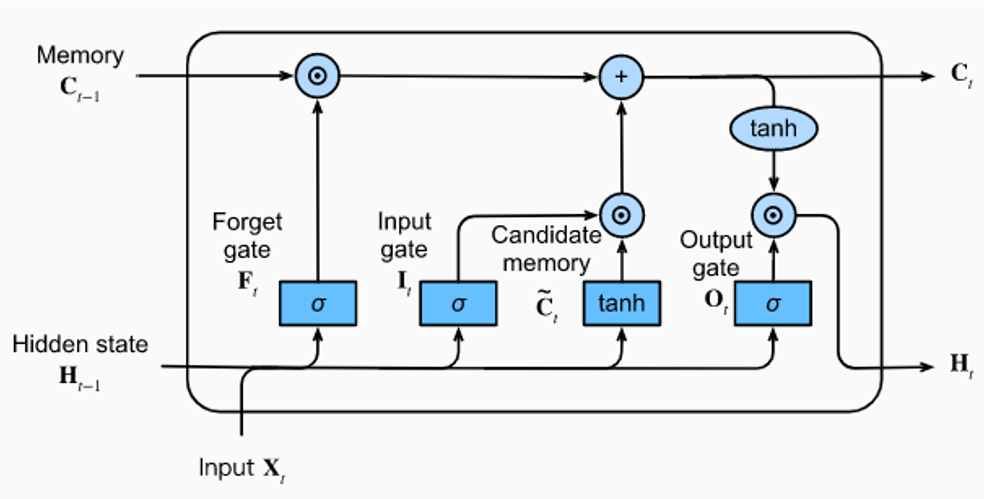

Input Size

In [198]:
input_shape=x_train.shape[1]
print(input_shape)

20


Defining the Vocabulary

In [199]:

vocabulary=len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length=le.classes_.shape[0]
print("output length : ",output_length)

number of unique words :  579
output length :  8


Model Creation

In [200]:
#creating the model
i=Input(shape=(input_shape,))
x=Embedding(vocabulary+1,10)(i)   
x=LSTM(10,return_sequences=True)(x)  

x=Flatten()(x)

x=Dense(output_length,activation="softmax")(x)
model=Model(i,x)

Model Compilation

In [201]:

model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

Model Training 

In [202]:
#training the model
train= model.fit(x_train,y_train,epochs=60)

Epoch 1/60


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.1394 - loss: 2.0623  
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2032 - loss: 1.9764
Epoch 3/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3197 - loss: 1.8619
Epoch 4/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4165 - loss: 1.7325
Epoch 5/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5465 - loss: 1.5418
Epoch 6/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6545 - loss: 1.3079
Epoch 7/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6800 - loss: 1.1652
Epoch 8/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8294 - loss: 0.9044
Epoch 9/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8690 - loss: 0.7056
Epoch 10/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8855 - loss: 0.5641
Epoch 11/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9016 - loss: 0.4460
Epoch 12/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9235 - loss: 0.384

Model Analysis

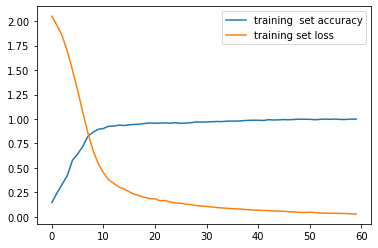

In [203]:
#plotting model accuracy
plt.plot(train.history['accuracy'],label='training  set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [204]:
y_out=model.predict(x_train)
y_pred_classes = np.argmax(y_out, axis=1)
y_pred_classes
tf.math.confusion_matrix(y_train,y_pred_classes)


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


<tf.Tensor: shape=(8, 8), dtype=int32, numpy=
array([[  8,   0,   0,   0,   0,   0,   0,   0],
       [  0, 117,   0,   0,   0,   0,   0,   0],
       [  0,   0, 123,   0,   0,   0,   0,   0],
       [  0,   0,   0, 117,   0,   0,   0,   0],
       [  0,   0,   0,   0, 100,   0,   0,   0],
       [  1,   0,   0,   0,   0,  97,   0,   0],
       [  0,   0,   0,   0,   0,   0,  96,   0],
       [  0,   0,   0,   0,   0,   0,   0, 119]])>

Testing

In [206]:
#chatting
import random
import string
import re
import mysql.connector  # Import the mysql.connector module for MySQL database connectivity

# Define your MySQL connection details
config = {
    'user': 'root',
    'password': 'Code@123',
    'host': 'localhost',
    'database': 'anant',
    'raise_on_warnings': True
}

# Function to query MySQL database for order status
def get_order_status(order_id):
    try:
        conn = mysql.connector.connect(**config)
        cursor = conn.cursor()

        query = "SELECT status FROM orders WHERE order_id = %s"
        cursor.execute(query, (order_id,))
        result = cursor.fetchone()

        conn.close()

        if result:
            return result[0]
        else:
            return "Order not found"
    except Exception as e:
        return "An error occurred: {}".format(e)

while True:
    texts_p = []
    prediction_input = input('You : ')
    
   

    # Removing punctuation and converting to lower case
    prediction_input1=prediction_input
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)

    # Tokenizing and padding (assuming these lines are elsewhere in your code)
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input], input_shape)

    # Getting output from the model (assuming these lines are elsewhere in your code)
    output = model.predict(prediction_input)
    output = output.argmax()

    # Finding the right tag and predicting (assuming these lines are elsewhere in your code)
    response_tag = le.inverse_transform([output])[0]
    print("Rammu Kaka : ", random.choice(responses[response_tag]))
    if response_tag == "Track_order":
         # Check if there's an order ID in the input and extract it using regex
        order_id_match = re.search(r'\b\d{6}\b', prediction_input1)
        if order_id_match:
            order_id = order_id_match.group()
            print("Order ID:", order_id)
        
            # Query the MySQL database for order status using the order ID
            order_status = get_order_status(order_id)
            print("Order Status:", order_status)
        else:
            print("No order ID found in input.")
        
    
    

    if response_tag == "farewell":
        break


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Rammu Kaka :  Greetings! How can I help you?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Rammu Kaka :  Good morning! How can I assist you?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Rammu Kaka :  here is the order status : 
Order ID: 111111
Order Status:  in-transit
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Rammu Kaka :  order status is: 
Order ID: 111111
Order Status:  in-transit
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Rammu Kaka :  order status is: 
Order ID: 111111
Order Status:  in-transit
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Rammu Kaka :  Good evening! How can I assist you?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Rammu Kaka :  Good evening! How can I assist you?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Rammu Kaka :  Greetings! How can I help you?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Rammu Kaka :  Sure, please provide your order number so I can check the status for you.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Rammu Kaka :  here is the order status : 
Order ID: 11111